<h2>About this Demo</h2>
<p>In this demo, you will see how the closed form solution is used to find the optimal solution for linear regression.</p>

<h2>Getting Started</h2>
<h3>Python Initialization</h3> 

<p>Please run the following code to initialize your Python kernel. You should be running a version of Python 3.x.</p>

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.8


## Generate Data
First, let's generate some data. We will sample $x$ randomly between $0$ and $1$, and let $y$ be sampled as: $y = 3x + 4 + \epsilon$, where $\epsilon \sim N(0, 0.01)$ is noise sampled from a Gaussian random variable of mean $0$ and standard deviation $0.01$.

In [2]:
N = 40
X = np.random.rand(N, 1) # Sample N points randomly along X-axis
X = np.hstack((X, np.ones((N, 1))))  # Add a constant dimension
w = np.array([3, 4]) # defining a linear function 
y = X @ w + (np.random.randn(N) * 0.1) # defining labels

## Visualize Data
Now, run the code below to visualize the data, which will roughly lie on a line.

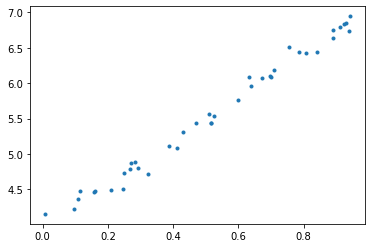

In [3]:
plt.plot(X[:, 0], y, '.')
plt.show()

## Learning Using Closed Form Solution

Recall the closed form solution when $\mathbf{X}$ is a $n \times d$ matrix with each data point as a row:

$$\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

In [4]:
w_closed = np.linalg.inv(X.T @ X) @ (X.T @ y)

**Quick quiz:**

There are two ways for calculating the closed form solution. Which one is more time-efficient?
1. `(np.linalg.inv(X.T @ X) @ X.T) @ y`
2. `np.linalg.inv(X.T @ X) @ (X.T @ y)`

You will find the answer later in the notebook, but do take a break and think how the order of operations affects efficiency!

## Visualize Closed Form Solution
You can visualize the closed form solution with a line that is drawn over your data, using this code:

In [5]:
def plot_linear(X, y, w):
    plt.plot(X[:, 0], y, '.') # plot the points
    z = np.array([[0,1],      # define two points with X-value 0 and 1 (and constant dimension)
                  [1,1]])
    plt.plot(z[:, 0], z @ w, 'r') # draw line w_closed through these two points
    plt.show()

In [ ]:
plot_linear(X, y, w_closed)

<h2>Pro-Tip: NumPy Linear Matrix Solver</h2>

<p>Computing matrix inverses can be numerically unstable and slow. Instead, one can use the <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html">Numpy linear matrix solver</a> to solve the following linear system:
$$(\mathbf{X}^T\mathbf{X})\mathbf{w} = \mathbf{X}^T\mathbf{y}$$
The solution is the same, but it is typically faster and more stable in case $(\mathbf{X}^T\mathbf{X})$ is not invertible.</p>

In [6]:
w_closed_np = np.linalg.solve(X.T @ X, X.T @ y)

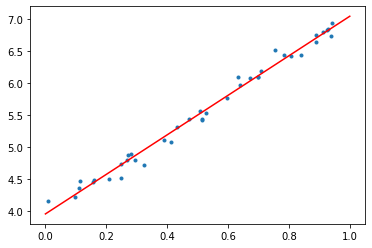

In [7]:
plot_linear(X, y, w_closed_np)

## Scikit-learn approach

[Scikit-learn](https://scikit-learn.org/stable/index.html) (or `sklearn`) is a Python library with implementations for numerous machine learning and data science models. Scikit-learn provides a standard step-by-step training procedure across different machine learning models, simplifying model training and prediction. The typical process for selecting, training, and predicting with a model of your choice is as follows:


1. Define the classifier `clf` using a call to the model class.
2. Train `clf` using `clf.fit` on training data.
3. Predict on test data using `clf.predict`, getting predictions as output.


Scikit-learn provides a [linear regression solver](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), which is demonstrated below. 

In [8]:
from sklearn.linear_model import LinearRegression

# Set parameter to False since intercept is already included in X (constant dim)
clf = LinearRegression(fit_intercept=False)
clf.fit(X, y)
w_sklearn = clf.coef_

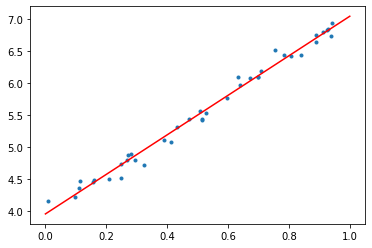

In [9]:
plot_linear(X, y, w_sklearn)

## Answer to quiz:

(2. `np.linalg.inv(X.T @ X) @ (X.T @ y)`) is more efficient than (1. `(np.linalg.inv(X.T @ X) @ X.T) @ y`). This is because (2.) performs 1 matrix-matrix multiplication ($d^2n$ calculations), 1 inverse solve ($d^3$ calculations), and 2 matrix-vector multiplications ($2dn$ calculations); whereas (1.) performs 2 matrix-matrix multiplications ($2d^2n$ calculations), 1 inverse solve ($d^3$ calculations), and 1 matrix-vector multiplications ($dn$ calculations). 

Add those up and you end up comparing (2.) $d^2n + d^3 + 2dn$ and (1.) $2d^2n + d^3 + dn$ calculations -- the former is smaller since $dn \le d^2n$.